In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pasienlama2.csv')
df

,id,NORM,TGL PELAYANAN,NAMA PASIEN,POLI TUJUAN,JAM DAFTAR,JAM MAP TERSEDIA,DURASI
0,1,49648,RJ100821-32758,SYARIF HIDAYAT,Hemodialisa,7:54:44,7:54:52,0:00:08
1,2,38459,RJ270821-38194,AHMAD FAUZI,Hemodialisa,9:43:00,9:43:09,0:00:09
2,3,169698,RJ180821-34532,HUSYAIRI,Poliklinik Radioterapi,7:17:13,7:17:24,0:00:11
3,4,44437,RJ270821-38052,MUNILAH NY.,Hemodialisa,8:14:13,8:14:24,0:00:11
4,5,140624,RJ140821-33942,NYOMAN SUTRIANI,Penyakit Dalam,9:09:51,9:10:02,0:00:11
...,...,...,...,...,...,...,...,...
7844,7845,584566,RJ060821-31954,SALWAN YASIN,Hemodialisa,12:07:41,12:12:03,0:04:22
7845,7846,36181,RJ060821-31953,RAFIK,Hemodialisa,12:05:51,12:12:03,0:06:12
7846,7847,98326,RJ060821-31952,"ARDHI MAJID, S.PD",Hemodialisa,12:03:35,12:12:03,0:08:28
7847,7848,547876,RJ060821-31951,M. DONI KURNIAWAN,Hemodialisa,12:01:38,12:12:03,0:10:25


In [3]:
durations = df.DURASI
durations_in_seconds = [int((datetime.strptime(duration, "%H:%M:%S") - datetime(1900, 1, 1)).total_seconds()) for duration in durations]

# Convert the list of duration data to a NumPy array
X = np.array(durations_in_seconds).reshape(-1, 1)

# Choose the number of clusters (k)
k = 5

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get the cluster centers (in seconds)
cluster_centers = kmeans.cluster_centers_

# Print cluster assignments and cluster centers
for i, label in enumerate(cluster_labels):
    print(f'Duration: {durations[i]}, Cluster: {label + 1}')

print("Cluster Centers (in seconds):")
for i, center in enumerate(cluster_centers):
    print(f'Cluster {i + 1}: {center[0]} seconds')

/home/gusanwa/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Duration: 0:00:08, Cluster: 1
Duration: 0:00:09, Cluster: 1
Duration: 0:00:11, Cluster: 1
Duration: 0:00:11, Cluster: 1
Duration: 0:00:11, Cluster: 1
Duration: 0:00:12, Cluster: 1
Duration: 0:00:12, Cluster: 1
Duration: 0:00:12, Cluster: 1
Duration: 0:00:12, Cluster: 1
Duration: 0:00:12, Cluster: 1
Duration: 0:00:12, Cluster: 1
Duration: 0:00:13, Cluster: 1
Duration: 0:00:13, Cluster: 1
Duration: 0:00:13, Cluster: 1
Duration: 0:00:14, Cluster: 1
Duration: 0:00:14, Cluster: 1
Duration: 0:00:14, Cluster: 1
Duration: 0:00:14, Cluster: 1
Duration: 0:00:14, Cluster: 1
Duration: 0:00:15, Cluster: 1
Duration: 0:00:15, Cluster: 1
Duration: 0:00:15, Cluster: 1
Duration: 0:00:15, Cluster: 1
Duration: 0:00:15, Cluster: 1
Duration: 0:00:15, Cluster: 1
Duration: 0:00:15, Cluster: 1
Duration: 0:00:15, Cluster: 1
Duration: 0:00:16, Cluster: 1
Duration: 0:00:16, Cluster: 1
Duration: 0:00:16, Cluster: 1
Duration: 0:00:16, Cluster: 1
Duration: 0:00:16, Cluster: 1
Duration: 0:00:16, Cluster: 1
Duration: 

/home/gusanwa/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gusanwa/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gusanwa/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gusanwa/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

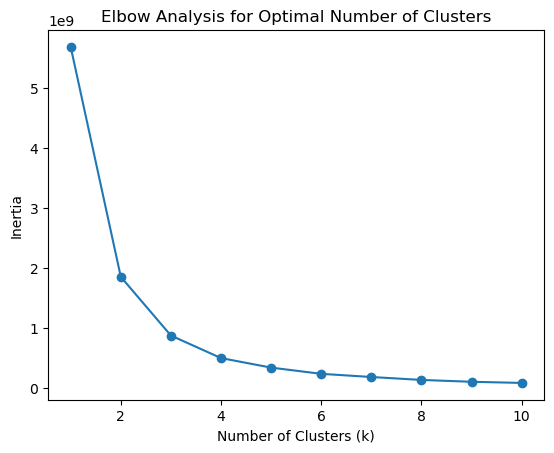

In [4]:
inertia_values = []

# Define a range of cluster numbers to test
k_values = range(1, 11)

# Perform KMeans clustering for each value of k and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Analysis for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [5]:
durations_in_seconds

[8,
 9,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 36,
 3

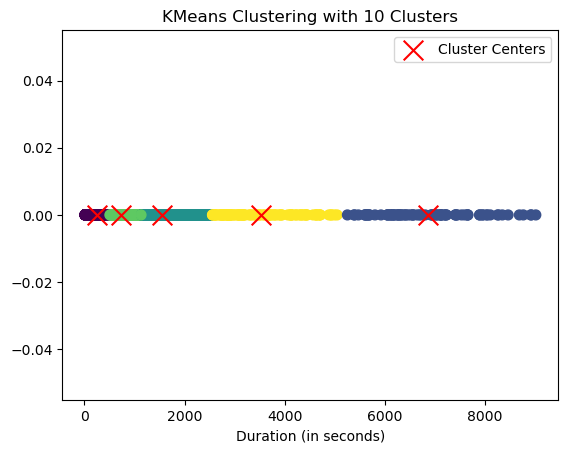

In [6]:


# Create a scatter plot of the data points with color-coded clusters
plt.scatter(X, [0] * len(X), c=cluster_labels, cmap='viridis', s=50)
plt.scatter(cluster_centers, [0] * len(cluster_centers), c='red', marker='x', s=200, label='Cluster Centers')

# Add labels and legend
plt.xlabel('Duration (in seconds)')
plt.title(f'KMeans Clustering with {k} Clusters')
plt.legend()

# Show the plot
plt.show()


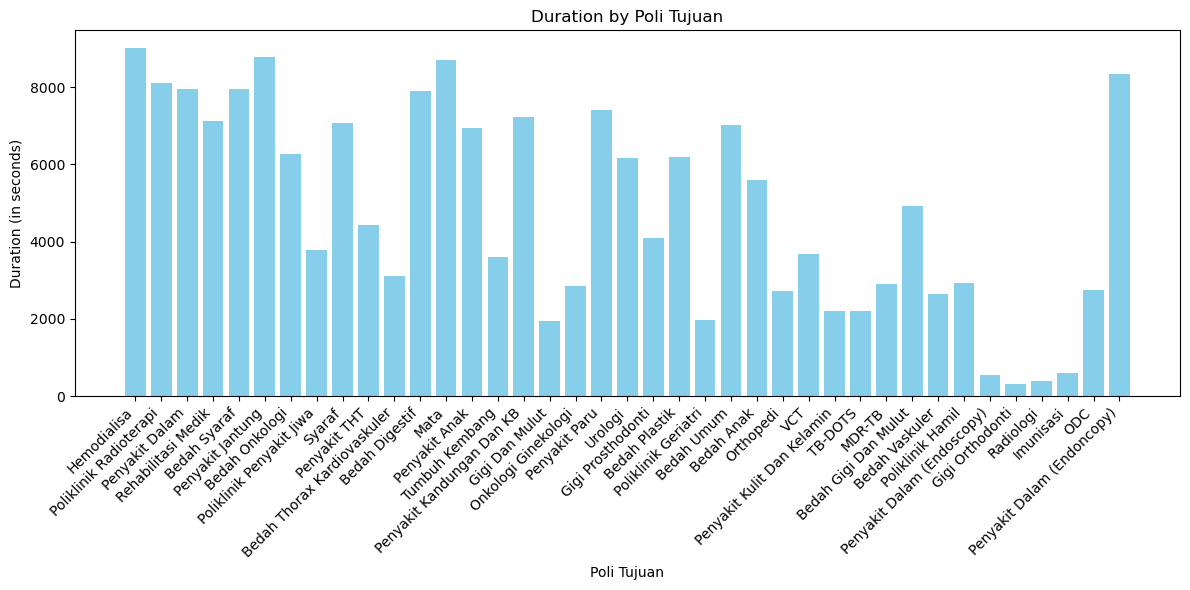

In [7]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize duration by "POLI TUJUAN"
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(df["POLI TUJUAN"], X[:, 0], color='skyblue')
plt.xlabel('Poli Tujuan')
plt.ylabel('Duration (in seconds)')
plt.title('Duration by Poli Tujuan')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


In [8]:
df['POLI TUJUAN']

0                  Hemodialisa
1                  Hemodialisa
2       Poliklinik Radioterapi
3                  Hemodialisa
4               Penyakit Dalam
                 ...          
7844               Hemodialisa
7845               Hemodialisa
7846               Hemodialisa
7847               Hemodialisa
7848                 Orthopedi
Name: POLI TUJUAN, Length: 7849, dtype: object

ValueError: x and y must be the same size

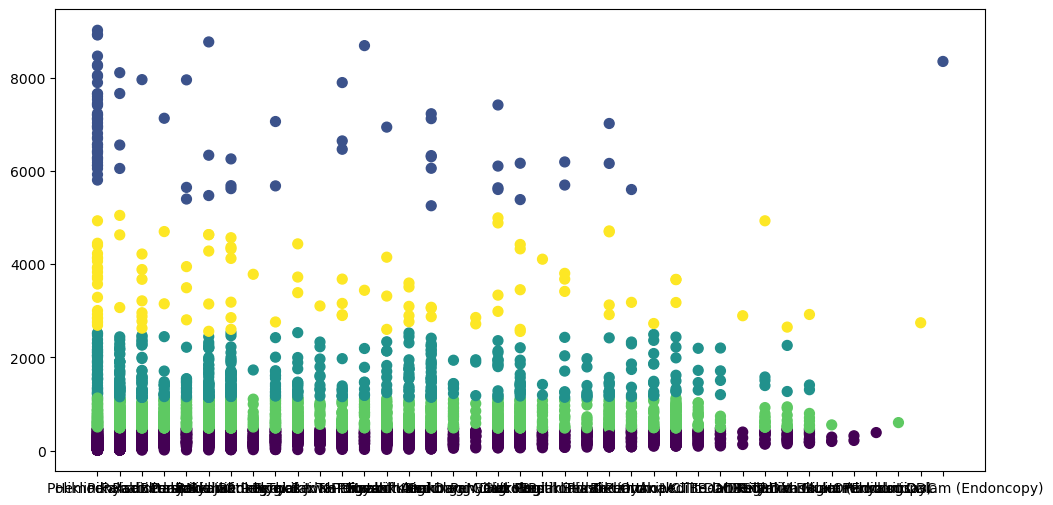

In [9]:
 import matplotlib.pyplot as plt

# Create a scatter plot of the data points with color-coded clusters
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.scatter(df["POLI TUJUAN"], X, c=cluster_labels, cmap='viridis', s=50)
plt.scatter(df["POLI TUJUAN"].unique(), cluster_centers, c='red', marker='x', s=200, label='Cluster Centers')

# Add labels and legend
plt.xlabel('Poli Tujuan')
plt.ylabel('Duration (in seconds)')
plt.title(f'KMeans Clustering with {k} Clusters')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a strip plot to visualize duration by "POLI TUJUAN" with cluster colors
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.stripplot(x=df["POLI TUJUAN"], y=X[:, 0], hue=cluster_labels, palette="viridis", dodge=True, jitter=True)

# Add labels and legend
plt.xlabel('Poli Tujuan')
plt.ylabel('Duration (in seconds)')
plt.title(f'KMeans Clustering with {k} Clusters')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.legend(title="Cluster")
plt.show()
